코드 관련 참고 사이트
https://colab.research.google.com/drive/1_GdoqCJWXsChrOiY8sZMr_zbr_fH-0Fg?usp=sharing#scrollTo=fGKcGR_kZAU7

경로 관련 참고 사이트
https://velog.io/@jhlee508/Object-Detection-YOLOv4-Darknet-%ED%95%99%EC%8A%B5%ED%95%98%EC%97%AC-Custom-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%9D%B8%EC%8B%9D-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-feat.-AlexeyABdarknet

In [110]:
#drive 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
#갑자기 디렉토리 사용불가능 할 때 사용
import os
path = "/content" 
os.chdir(path)

In [111]:
#remount해야할 때 사용
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [116]:
#darknet clone
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15445, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 15445 (delta 2), reused 16 (delta 1), pack-reused 15424
Receiving objects: 100% (15445/15445), 14.09 MiB | 19.76 MiB/s, done.
Resolving deltas: 100% (10367/10367), done.


In [120]:
# 필요한 함수들
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [121]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [123]:
#사진들은 다 /darknet/build/darknet/x64/data/obj에 저장하고
#아래는 저장된 사진들의 갯수를 가져옴
from glob import glob

img_list = glob('/content/drive/MyDrive/darknet/build/darknet/x64/data/obj/*.jpg')

len(img_list)

227

In [124]:
#가져온 사진을 토대로 train, test set 나누기
from sklearn.model_selection import train_test_split

train_img_list, test_img_list = train_test_split(img_list, test_size=0.1, random_state=42) # random_state는 임의로 선택

print(len(train_img_list), len(test_img_list))

204 23


In [154]:
#나눠진 set들을 train.txt, test.txt에 경로, 이름 저장
with open('/content/drive/MyDrive/darknet/build/darknet/x64/data/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('/content/drive/MyDrive/darknet/build/darknet/x64/data/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

In [165]:
#makefile을 GPU 및 OPENCV를 사용하도록 변경
%cd /content/drive/MyDrive/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

/content/drive/MyDrive/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
   

In [167]:
# train 하기!!
!./darknet detector train /content/drive/MyDrive/darknet/build/darknet/x64/data/obj.data /content/drive/MyDrive/darknet/build/darknet/x64/cfg/yolov4-obj.cfg /content/drive/MyDrive/darknet/build/darknet/x64/yolov4.conv.137 -dont_show

v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.886525), count: 6, class_loss = 0.027126, iou_loss = 0.171229, total_loss = 0.198355 
 total_bbox = 928214, rewritten_bbox = 0.148888 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.577987), count: 1, class_loss = 0.167705, iou_loss = 1.781006, total_loss = 1.948710 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.769400), count: 14, class_loss = 1.802789, iou_loss = 5.269505, total_loss = 7.072294 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.813770), count: 16, 

In [168]:
#중간에 끊겼을 때 train
!./darknet detector train /content/drive/MyDrive/darknet/build/darknet/x64/data/obj.data /content/drive/MyDrive/darknet/build/darknet/x64/cfg/yolov4-obj.cfg /content/drive/MyDrive/backup/yolov4-obj_last.weights -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov4-obj
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 3, batch = 24, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv   

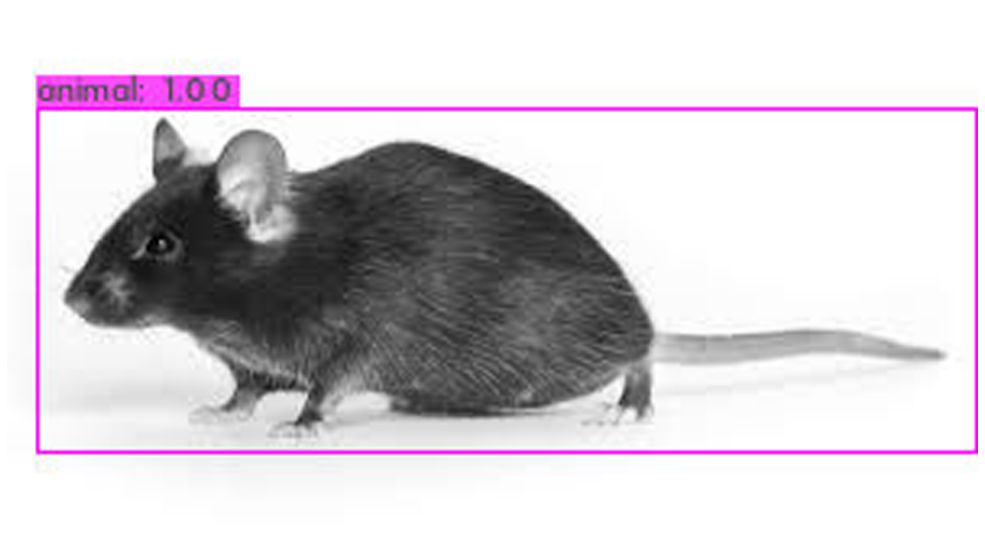

In [189]:
#test하기
!./darknet detector test /content/drive/MyDrive/darknet/build/darknet/x64/data/obj.data /content/drive/MyDrive/darknet/build/darknet/x64/cfg/yolov4-obj.cfg /content/drive/MyDrive/backup/yolov4-obj_last.weights /content/drive/MyDrive/darknet/build/darknet/x64/data/obj/animal32.jpg
imShow('predictions.jpg')